In [ ]:
# 15강  인공신경망 원리
# 뉴런을 모방한 머신러닝 모델. 입력층, (은닉층), 출력충으로 구성
# 은닉층이 포함된 모델이 딥러닝 모델
# 미분이 주로 적용됨(경사하강법 - 최소제곱법?)

import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([2,4,6,8])
y = np.array([30,75,55,90])

a1 = 0
b = 0
lr = 0.0005 # learning rate


for i in range(1, 3001):
    y_hat = a1 * x1 + b
    error = y_hat - y
    
    a1_diff = sum(2 * error * x1)
    b_diff = sum(2 * error * 1)

    a1 = a1 - a1_diff * lr
    b = b - b_diff * lr  

    print("{} 회 학습 / 기울기 {} / 절편 {}".format(i, a1, b))

1 회 학습 / 기울기 1.41 / 절편 0.25
2 회 학습 / 기울기 2.6458 / 절편 0.4708
3 회 학습 / 기울기 3.7288879999999995 / 절편 0.6660008
4 회 학습 / 기울기 4.678101423999999 / 절편 0.8387590368
5 회 학습 / 기울기 5.509954072384 / 절편 0.9918419721728
6 회 학습 / 기울기 6.238922744254464 / 절편 1.1276755228364288
7 회 학습 / 기울기 6.8776985044872 / 절편 1.2483863658599939
8 회 학습 / 기울기 7.437406956631536 / 절편 1.35583885030681
9 회 학습 / 기울기 7.927801344829615 / 절편 1.451667355772952
10 회 학습 / 기울기 8.357431836334602 / 절편 1.537304659453268
11 회 학습 / 기울기 8.733793922785384 / 절편 1.614006804088763
12 회 학습 / 기울기 9.063458515969364 / 절편 1.6828748984167001
13 회 학습 / 기울기 9.352185996084707 / 절편 1.744874228503646
14 회 학습 / 기울기 9.60502619198447 / 절편 1.8008510116679373
15 회 학습 / 기울기 9.826406028712976 / 절편 1.8515470837815762
16 회 학습 / 기울기 10.020206363591786 / 절편 1.8976127748721903
17 회 학습 / 기울기 10.189829344463329 / 절편 1.9396181965008659
18 회 학습 / 기울기 10.338257459197711 / 절편 1.9780631368255959
19 회 학습 / 기울기 10.468105301357474 / 절편 2.013385735094339
20 회 학습 / 기울기 10.5816

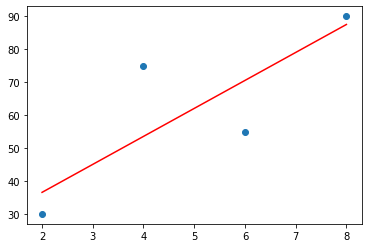

In [ ]:
plt.scatter(x1, y)
plt.plot(x1, a1 * x1 + b, 'red')

In [ ]:
a1 * 5 + b

62.023460611363305

In [16]:
# 16강 인공신경망과 딥러닝 만들기
# tensorflow. keras 이용

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

iris = load_iris()

data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)


model = keras.Sequential()  # 인공신경망을 만들기위한 도화지
model.add(keras.layers.Dense(8, activation='relu', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation='softmax'))

# Dense : 은닉층의 갯수를 추가할 수 있음, 갯수는 알아서 해도 됨

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

hist = model.fit(train_scaled, train_target, epochs = 420)  # 학습과정 기록


Epoch 1/420
4/4 [==============================] - 0s 4ms/step - loss: 1.0364 - accuracy: 0.3750
Epoch 2/420
4/4 [==============================] - 0s 3ms/step - loss: 1.0112 - accuracy: 0.4464
Epoch 3/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9947 - accuracy: 0.4911
Epoch 4/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9802 - accuracy: 0.5268
Epoch 5/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9662 - accuracy: 0.5714
Epoch 6/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9543 - accuracy: 0.5893
Epoch 7/420
4/4 [==============================] - 0s 4ms/step - loss: 0.9431 - accuracy: 0.6161
Epoch 8/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9320 - accuracy: 0.6429
Epoch 9/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9211 - accuracy: 0.6339
Epoch 10/420
4/4 [==============================] - 0s 3ms/step - loss: 0.9107 - accuracy: 0.6429
Epoch 11/420
4/4 [===========

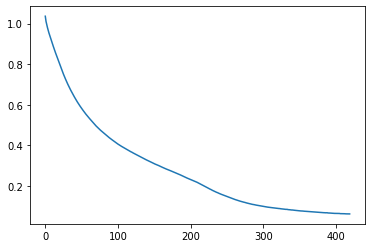

In [17]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])

In [18]:
model.evaluate(test_scaled, test_target)

2/2 [==============================] - 0s 7ms/step - loss: 0.0408 - accuracy: 0.9737


[0.04083699360489845, 0.9736841917037964]

In [20]:
# 17강 최적의 딥러닝 모델 만들기
# 인공신경망 최적화 옵션 EarlyStopping, Dropout, ModelCheckPoint
# relu : y=x꼴로 기울어진 부분이 포함된 함수. (상수-y=x-상수식)

from tensorflow import keras
from sklearn.model_selection import train_test_split

In [23]:
# 옷 데이터
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [24]:
train_input.shape

(60000, 28, 28)

In [25]:
test_input.shape

(10000, 28, 28)

In [31]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.1)

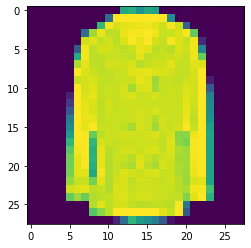

In [29]:
plt.imshow(train_input[2])

In [34]:
train_scaled = train_input.reshape(-1, 784) / 255
val_scaled = val_input.reshape(-1, 784) / 255
test_scaled = test_input.reshape(-1, 784) / 255

In [35]:
train_scaled.shape

(48600, 784)

In [40]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape = (784,)))
model.add(keras.layers.Dropout(0.3))  # 은닉충의 30% (0.3)을 랜덤으로 끄겠다
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

es = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
cp = keras.callbacks.ModelCheckpoint('best.h3')

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
# optimizer : 학습률 조정

hist = model.fit(train_scaled, train_target, epochs = 420, validation_data = 
                 (val_scaled, val_target), callbacks=[es,cp])

Epoch 1/420
1505/1519 [============================>.] - ETA: 0s - loss: 0.5702 - accuracy: 0.7934

KeyboardInterrupt: ignored

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [41]:
# 18강  이미지를 위한 딥러닝 CNN(컨볼루셔널 신경망)

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [43]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target,
                                                                    test_size=0.1)

In [44]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255  # 흑백데이터 (흑백을 알려주기위해, 4차원)
val_scaled = val_input.reshape(-1, 28, 28, 1) / 255
test_scaled = test_input.reshape(-1, 28, 28, 1) / 25

In [51]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

hist = model.fit(train_scaled, train_target, epochs=10000, validation_data = (val_scaled, val_target),
                 callbacks=[es])

Epoch 1/10000
1519/1519 [==============================] - 49s 32ms/step - loss: 0.5377 - accuracy: 0.8037 - val_loss: 0.3503 - val_accuracy: 0.8724
Epoch 2/10000
1519/1519 [==============================] - 46s 30ms/step - loss: 0.3521 - accuracy: 0.8721 - val_loss: 0.3050 - val_accuracy: 0.8876
Epoch 3/10000
1519/1519 [==============================] - 58s 38ms/step - loss: 0.3058 - accuracy: 0.8882 - val_loss: 0.2720 - val_accuracy: 0.8972
Epoch 4/10000
1519/1519 [==============================] - 53s 35ms/step - loss: 0.2784 - accuracy: 0.8989 - val_loss: 0.2444 - val_accuracy: 0.9059
Epoch 5/10000
1519/1519 [==============================] - 46s 30ms/step - loss: 0.2572 - accuracy: 0.9055 - val_loss: 0.2431 - val_accuracy: 0.9120
Epoch 6/10000
1519/1519 [==============================] - 46s 30ms/step - loss: 0.2408 - accuracy: 0.9125 - val_loss: 0.2319 - val_accuracy: 0.9137
Epoch 7/10000
1519/1519 [==============================] - 46s 31ms/step - loss: 0.2254 - accuracy: 0.9176

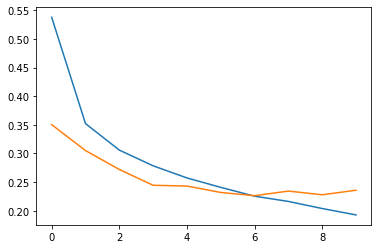

In [52]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [55]:
# 19강 시계열 데이터를 위한 딥러닝 (RNN, LSTM)

from tensorflow import keras
from sklearn.model_selection import train_test_split

# imdb : 영화리뷰데이터(긍정,부정) //  많이 사용된 순으로 500위까지만 가져온다(num_words)
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=420)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2)

In [56]:
import numpy as np

box = []

for i in train_input:
    box.append(len(i))

np.mean(box)

239.09185

In [76]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 단어 갯수 상관없이 무조건 리뷰 안에 있는 단어를 100개로 맞춘다는 것
train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [64]:
# 단어가 많으면 앞에서부터 자름.
# 단어가 적으면 0으로 채워서라도 100개를 맞춤.

train_seq.shape

(20000, 100)

In [67]:
train_seq[8]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  13, 161, 104,
        12,  16,   2,  18,   6, 189, 212,  22,   8,   2,  38,   2,  23,
       199,   2,  66, 373,   4, 192,  15,  12, 152, 193, 410,   2,   2,
         6,  52, 155,   2,   2,  12,   2,  88,   4, 156,  26,  38,   2,
        25,  66,  62,   2,  36,  26,   2,   2,   2,  23,   4,   2, 151,
         4,   2, 310,  17, 210,  47,   6, 171,   2], dtype=int32)

In [68]:
# one hot encording  : 해당 숫자만 1이고 나머지는 다 0인 인코딩

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [69]:
train_oh.shape

(20000, 100, 420)

In [71]:
train_oh[8]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [77]:
model = keras.Sequential()
model.add(keras.layers.LSTM(8, input_shape = (100, 420))) # SimpleRNN과 LSTM을 서로 바꿔서 그대로 사용해도 됨
model.add(keras.layers.Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy', optimizer='adam')

es = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model.fit(train_oh, train_target, epochs = 10000, validation_data = (val_oh, val_target),
                 callbacks = [es])

Epoch 1/10000
625/625 [==============================] - 27s 38ms/step - loss: 0.6010 - accuracy: 0.6597 - val_loss: 0.4756 - val_accuracy: 0.7736
Epoch 2/10000
625/625 [==============================] - 26s 41ms/step - loss: 0.4682 - accuracy: 0.7786 - val_loss: 0.4512 - val_accuracy: 0.7852
Epoch 3/10000
625/625 [==============================] - 24s 38ms/step - loss: 0.4424 - accuracy: 0.7911 - val_loss: 0.4516 - val_accuracy: 0.7874
Epoch 4/10000
625/625 [==============================] - 23s 37ms/step - loss: 0.4328 - accuracy: 0.7982 - val_loss: 0.4467 - val_accuracy: 0.7838
Epoch 5/10000
625/625 [==============================] - 23s 37ms/step - loss: 0.4244 - accuracy: 0.8019 - val_loss: 0.4400 - val_accuracy: 0.7934
Epoch 6/10000
625/625 [==============================] - 23s 36ms/step - loss: 0.4189 - accuracy: 0.8024 - val_loss: 0.4363 - val_accuracy: 0.7974
Epoch 7/10000
625/625 [==============================] - 23s 37ms/step - loss: 0.4119 - accuracy: 0.8048 - val_loss: 0

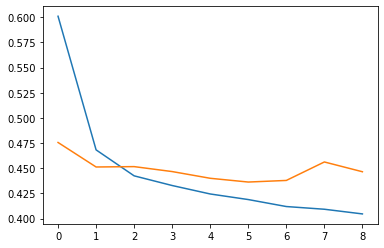

In [79]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [89]:
# 20강 데이터 크롤링을 통한 삼성전자 주식가격 예측하기
# 실전연습 강의

import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm import tqdm

dic = {'User-Agent' : 'Mozilla/5.0 (Macintosh: Intel Max OS X 12_6)'}

total = []

for i in range(1, 662):

    url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page={}".format(i), headers=dic)
    html = BeautifulSoup(url.text)

    table = html.find('table')
    table = pd.read_html(str(table))[0].dropna()
    del table['전일비']
    total.append(table)
    time.sleep(0.1)


In [90]:
len(total)

661

In [91]:
samsung = pd.concat(total, ignore_index=True)
samsung = samsung[::-1]
samsung

,날짜,종가,시가,고가,저가,거래량
6606,1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0
6605,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
6604,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
6603,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
6602,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
4,2022.10.17,56600.0,55800.0,57000.0,55700.0,13641878.0
3,2022.10.18,56500.0,56700.0,57100.0,55800.0,14820702.0
2,2022.10.19,55800.0,56700.0,56900.0,55700.0,12660652.0
1,2022.10.20,55500.0,55200.0,56000.0,55100.0,17107653.0


In [92]:
samsung.index = range(len(samsung))
samsung

,날짜,종가,시가,고가,저가,거래량
0,1996.06.25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6602,2022.10.17,56600.0,55800.0,57000.0,55700.0,13641878.0
6603,2022.10.18,56500.0,56700.0,57100.0,55800.0,14820702.0
6604,2022.10.19,55800.0,56700.0,56900.0,55700.0,12660652.0
6605,2022.10.20,55500.0,55200.0,56000.0,55100.0,17107653.0


In [97]:
data = []
target = []

for i in range(len(samsung) -1):
    a = list(samsung.iloc[i, 1:])
    b = samsung.iloc[i+1, 1]
    data.append(a)
    target.append(b)

In [98]:
import numpy as np

data = np.array(data)
target = np.array(target)

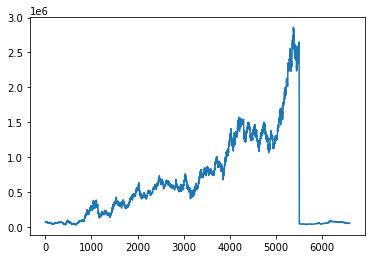

In [99]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

plt.plot(target)

In [100]:
rf = RandomForestRegressor()
rf.fit(data, target)

RandomForestRegressor()

In [102]:
a = list(samsung.iloc[-1][1:])
a

[55900.0, 55100.0, 56300.0, 55100.0, 9976918.0]

In [103]:
rf.predict([a])  # 2022.10.24 주가예측

array([56290.])